In [5]:
TEST_FILE_DIR = "../../test_data/unit_tests/input_table_formats"
OUTDIR = f"{TEST_FILE_DIR}/outdir"

SPECTRONAUT_FILE = f"{TEST_FILE_DIR}/spectronaut.frgions.large.tsv"

FILE_DEFAULT = "default_out.tsv"
FILE_DASK_PROC = "dask_proc_out.tsv"



In [6]:

import os
import pandas as pd
import shutil
import alphabase.quantification.quant_reader.config_dict_loader as config_dict_loader
import alphabase.quantification.quant_reader.longformat_reader as longformat_reader



def test_table_loadings(input_file, outdir, file_default, file_dask_proc):
    if not os.path.exists(outdir):
        os.mkdir(outdir)
        #os.chdir(outdir)

    input_type, config_dict_for_type, sep = config_dict_loader.get_input_type_and_config_dict(input_file)

    longformat_reader.reformat_and_write_longtable_according_to_config(input_file,outfile_name=file_default,config_dict_for_type=config_dict_for_type, chunksize=10_000)
    longformat_reader.reformat_and_write_longtable_according_to_config(input_file,outfile_name=file_dask_proc,config_dict_for_type=config_dict_for_type, enforce_largefile_processing=True, chunksize=10_000)

    df_default = pd.read_csv(file_default, sep = "\t")

    df_dask_proc = pd.read_csv(file_dask_proc, sep = "\t")

    df_dask_proc = df_dask_proc[df_default.columns]
    display(df_default)
    display(df_dask_proc)

    assert df_default.equals(df_dask_proc)
    
    assert set(df_default["quant_id"]) == set(df_dask_proc["quant_id"])

    os.remove(file_default)
    os.remove(file_dask_proc)
    shutil.rmtree(outdir)


test_table_loadings(SPECTRONAUT_FILE, OUTDIR, FILE_DEFAULT, FILE_DASK_PROC)


,protein,quant_id,MS1ISOTOPES,MOD,SEQ,FRGION,CHARGE,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_03.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_08.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw
0,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,0.0,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,NaN,2,0.000000,0.000000,0.000000,2.202897e+06,2.228274e+06
1,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,1.0,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,NaN,2,0.000000,0.000000,0.000000,2.024638e+06,2.428704e+06
2,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,2.0,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,NaN,2,0.000000,0.000000,0.000000,1.295609e+06,7.313261e+05
3,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,NaN,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,b4_noloss_1,2,0.000000,0.000000,0.000000,1.617023e+04,1.602696e+04
4,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,NaN,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,b6_NH3_1,2,0.000000,0.000000,0.000000,1.096225e+04,8.629451e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,P00942,WVILGHSER_AND__WVILGHSER__AND_3_AND_b4_noloss_1,NaN,_WVILGHSER_,WVILGHSER,b4_noloss_1,3,479.238098,414.172729,111.562546,0.000000e+00,1.535607e+03
3746,P00942,WVILGHSER_AND__WVILGHSER__AND_3_AND_y3_noloss_1,NaN,_WVILGHSER_,WVILGHSER,y3_noloss_1,3,1263.473389,1149.526367,0.000000,8.259057e+05,7.569853e+05
3747,P00942,WVILGHSER_AND__WVILGHSER__AND_3_AND_y5_noloss_1,NaN,_WVILGHSER_,WVILGHSER,y5_noloss_1,3,3425.583008,3110.518799,3112.172852,1.613446e+06,1.473180e+06
3748,P00942,WVILGHSER_AND__WVILGHSER__AND_3_AND_y6_noloss_1,NaN,_WVILGHSER_,WVILGHSER,y6_noloss_1,3,2799.014648,2389.649170,2588.215088,1.360443e+06,1.241502e+06


,protein,quant_id,MS1ISOTOPES,MOD,SEQ,FRGION,CHARGE,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_03.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_08.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw
0,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,0.0,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,NaN,2,0.000000,0.000000,0.000000,2.202897e+06,2.228274e+06
1,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,1.0,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,NaN,2,0.000000,0.000000,0.000000,2.024638e+06,2.428704e+06
2,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,2.0,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,NaN,2,0.000000,0.000000,0.000000,1.295609e+06,7.313261e+05
3,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,NaN,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,b4_noloss_1,2,0.000000,0.000000,0.000000,1.617023e+04,1.602696e+04
4,A5Z2X5,LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2_...,NaN,_LTGNPELSSLDEVLAK_,LTGNPELSSLDEVLAK,b6_NH3_1,2,0.000000,0.000000,0.000000,1.096225e+04,8.629451e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,P00942,WVILGHSER_AND__WVILGHSER__AND_3_AND_b4_noloss_1,NaN,_WVILGHSER_,WVILGHSER,b4_noloss_1,3,479.238098,414.172729,111.562546,0.000000e+00,1.535607e+03
3746,P00942,WVILGHSER_AND__WVILGHSER__AND_3_AND_y3_noloss_1,NaN,_WVILGHSER_,WVILGHSER,y3_noloss_1,3,1263.473389,1149.526367,0.000000,8.259057e+05,7.569853e+05
3747,P00942,WVILGHSER_AND__WVILGHSER__AND_3_AND_y5_noloss_1,NaN,_WVILGHSER_,WVILGHSER,y5_noloss_1,3,3425.583008,3110.518799,3112.172852,1.613446e+06,1.473180e+06
3748,P00942,WVILGHSER_AND__WVILGHSER__AND_3_AND_y6_noloss_1,NaN,_WVILGHSER_,WVILGHSER,y6_noloss_1,3,2799.014648,2389.649170,2588.215088,1.360443e+06,1.241502e+06


In [7]:
import alphabase.quantification.quant_reader.quant_reader_manager as quant_reader_manager
import os
import shutil

INPUT_FILES = [os.path.join(TEST_FILE_DIR, x ) for x in ["diann.tsv", "spectronaut.tsv", "spectronaut_frgion.tsv", "mq_peptides.txt", "diann_test_input_mDIA.tsv"]]


def perform_table_loading(SPECTRONAUT_FILE):
    """only makes sure that the commands run without error"""
    
    #import the input table once the input and the results folder are specified. 
    # The function automatically recognizes the format (Currently MQ, Spectronaut, DIA-NN configured)
    input_data = quant_reader_manager.import_data(SPECTRONAUT_FILE)
    #display(input_data)
    

for idx in range(len(INPUT_FILES)):
    perform_table_loading(INPUT_FILES[idx])
    print('loading ran through')




using input type diann_fragion_isotopes
loading ran through
using input type spectronaut_precursor_v2
loading ran through
using input type spectronaut_fragion_isotopes
loading ran through
using input type maxquant_peptides
loading ran through
using input type diann_fragion_isotopes_mDIA_raw
loading ran through


using input type spectronaut_precursor_v2


,protein,MOD,CHARGE,SEQ,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_03.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_08.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw
quant_id,,,,,,,,,
LTGNPELSSLDEVLAK_AND__LTGNPELSSLDEVLAK__AND_2,A5Z2X5,_LTGNPELSSLDEVLAK_,2,LTGNPELSSLDEVLAK,NaN,NaN,NaN,8.526810e+04,7.576243e+04
ALQSINVK_AND__ALQSINVK__AND_2,O13297,_ALQSINVK_,2,ALQSINVK,NaN,NaN,NaN,3.606976e+04,3.476134e+04
FSIIESQTR_AND__FSIIESQTR__AND_2,O13297,_FSIIESQTR_,2,FSIIESQTR,NaN,NaN,NaN,1.336459e+05,1.651850e+05
GISEVTENTGK_AND__GISEVTENTGK__AND_2,O13297,_GISEVTENTGK_,2,GISEVTENTGK,NaN,NaN,NaN,5.649115e+04,6.469086e+04
IAGNAVGSVVK_AND__IAGNAVGSVVK__AND_2,O13297,_IAGNAVGSVVK_,2,IAGNAVGSVVK,NaN,NaN,NaN,4.423597e+04,4.267472e+04
...,...,...,...,...,...,...,...,...,...
TFFVGGNFK_AND__TFFVGGNFK__AND_2,P00942,_TFFVGGNFK_,2,TFFVGGNFK,NaN,NaN,99103.742188,1.586443e+07,1.547431e+07
TLDVVER_AND__TLDVVER__AND_1,P00942,_TLDVVER_,1,TLDVVER,NaN,NaN,NaN,3.609795e+05,3.837820e+05
TLDVVER_AND__TLDVVER__AND_2,P00942,_TLDVVER_,2,TLDVVER,406187.343750,442512.531250,413241.312500,3.002293e+07,3.105749e+07


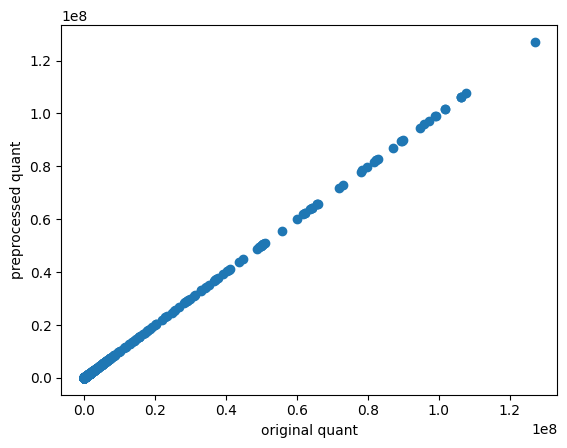

correlation between both processings: 0.9999999999999999


In [8]:

#hide
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compare_generic_table_with_original(preprocessed_input_df, original_spectronaut_file, config_yaml,input_typename_config, sep = "\t"):
    preprocessed_input_df.to_csv("/tmp/preprocessed_input.tsv", sep = "\t", index = False)
    id2quant_orig, id2quant_preproc = get_processed_original_id2quant_maps(preprocessed_input_df, original_spectronaut_file, config_yaml,input_typename_config)
    keys_orig = set(id2quant_orig.keys())
    keys_preproc = set(id2quant_preproc.keys())
    keydiff = keys_orig.difference(keys_preproc)
    keys_orig = sorted(keys_orig)
    keys_preproc = sorted(keys_preproc)
    
    
    assert(len(keydiff)==0) #check that all keys in the preprocessed set are part of the original set

    assert set(id2quant_orig.keys()) == set(id2quant_preproc.keys())
    
    quantvec_orig = np.array([id2quant_orig.get(x)for x in id2quant_preproc.keys()])
    quantvec_preproc = np.array([id2quant_preproc.get(x)for x in id2quant_preproc.keys()])
    plt.show()
    plt.scatter(quantvec_orig, quantvec_preproc)
    plt.xlabel("original quant")
    plt.ylabel("preprocessed quant")
    plt.show()
    corrcoeff = np.corrcoef(quantvec_orig,quantvec_preproc)[0][1]
    print(f"correlation between both processings: {corrcoeff}")
    assert(corrcoeff>0.999)



def get_processed_original_id2quant_maps(preprocessed_input_df, original_spectronaut_file, config_yaml,input_typename_config, sep = "\t"):
    config_all = yaml.safe_load(open(config_yaml, 'r'))
    config_dict = config_all.get(input_typename_config)
    id_cols = config_dict.get("ion_cols") + [config_dict.get("sample_ID")]
    quant_col = list(config_dict.get("quant_ID").values())
    id2quant_orig = get_id2quant_original(original_spectronaut_file, id_cols, quant_col, sep)
    id2quant_preproc = get_id2quant_processed(preprocessed_input_df)

    return id2quant_orig, id2quant_preproc


def get_id2quant_original(original_spectronaut_file, id_cols, quant_col, sep):
    orig_df = pd.read_csv(original_spectronaut_file, sep=sep, usecols= id_cols+quant_col)
    orig_df["compareID"] = orig_df[id_cols].astype('string').sum(axis = 1)
    id2quant = dict(zip(orig_df["compareID"], orig_df[quant_col[0]]))
    id2quant = {k: round(v,3) for k, v in id2quant.items()}
    return id2quant


def get_id2quant_processed(preprocessed_input_df):
    quant_cols = [x for x in preprocessed_input_df.columns if x.endswith(".raw")]
    melted_preproc_df = preprocessed_input_df.melt(id_vars = ["MOD", "CHARGE"], value_vars = quant_cols).dropna()
    melted_preproc_df["compareID"] = melted_preproc_df["MOD"].astype('string') + melted_preproc_df["CHARGE"].astype('int').astype('string') + melted_preproc_df["variable"].astype('string')
    melted_preproc_df.to_csv("/tmp/melted_preproc.tsv", sep = "\t", index = False)
    id2quant_preproc = dict(zip(melted_preproc_df["compareID"], melted_preproc_df["value"]))
    return id2quant_preproc


def load_and_format_input_data(input_file, input_type_to_use):
    input_df = quant_reader_manager.import_data(input_file, input_type_to_use=input_type_to_use)
    input_df = input_df.set_index('quant_id')
    input_df["CHARGE"] = input_df["CHARGE"].astype('string')
    #get all column names with numerical values
    numerical_cols = input_df.select_dtypes(include=['number']).columns
    input_df = input_df.replace(0, np.nan)
    #input_df[numerical_cols] = np.log2(input_df[numerical_cols].replace(0, np.nan))
    return input_df



input_df = load_and_format_input_data(SPECTRONAUT_FILE, "spectronaut_precursor_v2")
display(input_df)
compare_generic_table_with_original(input_df, SPECTRONAUT_FILE, "../../alphabase/constants/const_files/quant_reader_config.yaml", "spectronaut_precursor_v2")



In [9]:
import glob
import os

# Define the directory to search in

# Find all files with "aq_reformat.tsv" at the end
files_to_delete = glob.glob(os.path.join(TEST_FILE_DIR, "*aq_reformat.tsv"))

# Delete the files
for file in files_to_delete:
    os.remove(file)
    print(f"Deleted: {file}")
    

Deleted: ../../test_data/unit_tests/input_table_formats/spectronaut.tsv.spectronaut_precursor_v2.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/diann_test_input_mDIA.tsv.diann_fragion_isotopes_mDIA_raw.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/mq_peptides.txt.maxquant_peptides.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/spectronaut_frgion.tsv.spectronaut_fragion_isotopes.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/spectronaut.frgions.large.tsv.spectronaut_precursor_v2.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/diann.tsv.diann_fragion_isotopes.aq_reformat.tsv
